In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy.stats as stat
import random
import diff_classifier.aws as aws
import diff_classifier.msd as msd
from diff_classifier.msd import binning, precision_weight, precision_averaging, plot_all_experiments
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
folder = 'PS_1k_5k_10k_PEG_in_agarose'
bucket = 'dtoghani.data'
experiment = '100nm_5k_PEG' #Used for naming purposes. Should exclude XY and well information

vids = 20
to_track = []
wells = 4
frames = 651
fps = 100.02

for num in range(1, vids+1):
    to_track.append('{}_XY{}'.format(experiment, '%02d' % num)) #As per usual, use for loops to include all experiments

slices, bins, well_names = binning(to_track, prefix=experiment)
geoM2xy = {}
gSEM = {}
for sample_name in to_track:
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geoM2xy[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geoM2xy[sample_name], gSEM[sample_name] = msd.gavg_MSDs(sample_name, remote_folder=folder, bucket=bucket)

In [3]:
gSEM

{'100nm_5k_PEG_XY01': array([ 0.        ,  0.01060428,  0.01253729,  0.01345061,  0.01465454,
         0.01536641,  0.01651007,  0.01710755,  0.01784105,  0.01830024,
         0.01892805,  0.01937654,  0.01999561,  0.02048877,  0.02108343,
         0.02157785,  0.02196719,  0.02251201,  0.02312872,  0.02379262,
         0.02473259,  0.02606393,  0.0263373 ,  0.02761162,  0.02899876,
         0.03102272,  0.03095308,  0.03274223,  0.03379375,  0.03563218,
         0.03684151,  0.03812401,  0.03922957,  0.04060329,  0.04285869,
         0.04381568,  0.04634915,  0.04798858,  0.04922192,  0.05172984,
         0.05523243,  0.0560855 ,  0.0594374 ,  0.05906982,  0.06094695,
         0.06390044,  0.06524036,  0.06693287,  0.06843643,  0.0713078 ,
         0.07452152,  0.07770418,  0.08047378,  0.08219292,  0.08414256,
         0.08684452,  0.08911712,  0.09184943,  0.09299035,  0.09510064,
         0.09739519,  0.09918145,  0.10273031,  0.10477997,  0.10698883,
         0.11107626,  0.114515

In [4]:
geo_slices = {}
gSEM_slices = {}

w_slices = {}
wo_slices = {}
w_holder = {}
wh = {}
gh = {}

for key in bins:
    wo_slices[key], wh[key] = precision_weight(bins[key], gSEM)
    geo_slices[key], gSEM_slices[key], w_holder[key], gh[key] = precision_averaging(bins[key], geoM2xy, gSEM, wo_slices[key],
                                                            bucket=bucket, folder=folder, experiment=key) 

for key in geo_slices:
    geo_slices[key][geo_slices[key]==0.0] = np.nan
    gSEM_slices[key][gSEM_slices[key]==0.0] = np.nan
    
    geo_slices[key] = ma.masked_invalid(geo_slices[key])
    gSEM_slices[key] = ma.masked_invalid(gSEM_slices[key])
    
weights, wh1 = precision_weight(well_names, gSEM_slices)
geo, gS, w_holder1, gh1 = precision_averaging(well_names, geo_slices, gSEM_slices, weights, bucket=bucket, folder=folder, experiment=experiment)

/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:586: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:631: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(gSEM[sample]*gSEM[sample]))/weights
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:633: RuntimeWarning: divide by zero encountered in true_divide
  gSEM_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])


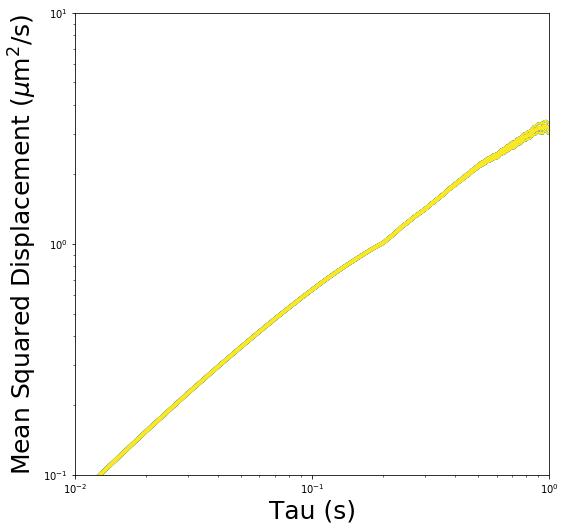

In [5]:
to_plot_f = [experiment, experiment, experiment, experiment, experiment, experiment]
plot_all_experiments(to_plot_f, bucket=bucket, folder=folder)

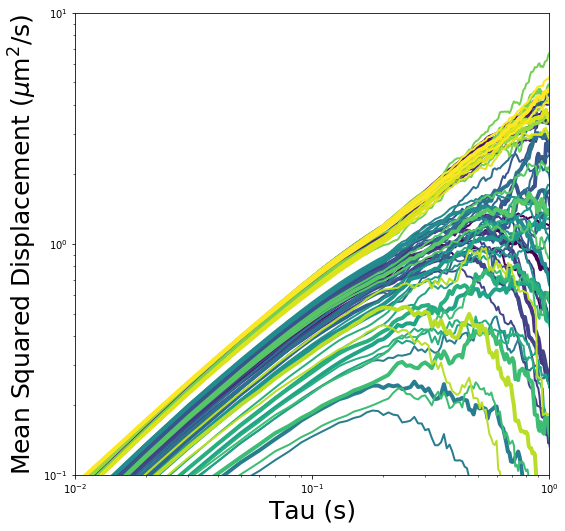

In [6]:
to_plot = []
for key in geoM2xy:
    to_plot.append(key)
    
plot_all_experiments(to_plot, bucket=bucket, folder=folder, exponential=True)

In [ ]:
wo_slices

In [ ]:
counter = 0
for key in wo_slices:
    if counter==0:
        test = wo_slices[key]
    else:
        test = test + wo_slices[key]
    counter = counter + 1

In [ ]:
gSEM

In [ ]:
geoM2xy